In [0]:
import os
import dill
from google.colab import drive

backup_dir = '/content/drive/My Drive/gunlaws'
backup_file = 'word2vec_deeplearning_classifier_multiclass_env.db'
backup_path = backup_dir + '/' + backup_file
def init_drive():
  # create directory if not exist
  drive.mount('drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path)

def load_session():
  init_drive()
  dill.load_session(backup_path)

In [0]:
save_session()

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


TypeError: ignored

In [0]:
import numpy as np
import pandas as pdfor
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [0]:
df1=pd.read_excel('/content/drive/My Drive/gunlaws/shuffled_gunlaw_multiclass.xlsx')

In [0]:
df1.drop(df1.columns[[0]],axis=1,inplace=True)
df1.head()

,date,text,label
0,2019-09-20,RT @truly_daphne: What I meant was -- it is cr...,for
1,2019-09-23,RT @gmbutts: Mr Scheer said he couldn’t wait t...,for
2,2019-11-09,I've never seen Socialism summed up better in ...,against
3,2019-11-05,In for a rude #AR15 awakening... https://t.co/...,against
4,2019-11-20,Gates/Buffett 2020 #gatesbuffett2020 @WarrenBu...,neutral


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
df1['label']= labelencoder_y.fit_transform(df1['label'])
df1 = pd.concat([df1[['date','text']],pd.get_dummies(df1['label'])],axis=1)

In [0]:
df1.head()

,date,text,0,1,2
0,2019-09-20,RT @truly_daphne: What I meant was -- it is cr...,0,1,0
1,2019-09-23,RT @gmbutts: Mr Scheer said he couldn’t wait t...,0,1,0
2,2019-11-09,I've never seen Socialism summed up better in ...,1,0,0
3,2019-11-05,In for a rude #AR15 awakening... https://t.co/...,1,0,0
4,2019-11-20,Gates/Buffett 2020 #gatesbuffett2020 @WarrenBu...,0,0,1


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history,name_of_fig):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    f=plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    f.savefig(name_of_fig, bbox_inches='tight', dpi=400)

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets_lines=list()
lines=df1['text'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  tokens = [w.lower() for w in tokens]
  table = str.maketrans('','',string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  tweets_lines.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import gensim
EMBEDDING_DIM=100

model_gensim = gensim.models.Word2Vec(sentences=tweets_lines,size=EMBEDDING_DIM,window=10,workers=4,min_count=1)
words = list(model_gensim.wv.vocab)
print('Vocabulary size:', len(words))

Vocabulary size: 66295


In [0]:
model_gensim.wv.most_similar('antigun')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('offense', 0.9878673553466797),
 ('uneducated', 0.9861649870872498),
 ('masses', 0.9834739565849304),
 ('charlesppierce', 0.9826552867889404),
 ('assume', 0.9823460578918457),
 ('nogunsincanada', 0.9818507432937622),
 ('unlawful', 0.9816405773162842),
 ('gungrab', 0.9816212058067322),
 ('choosemaxime', 0.9813879728317261),
 ('nope', 0.9805517792701721)]

In [0]:
model_gensim.wv.save_word2vec_format('/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec_multiclass.txt',binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import os
embeddings_index={}
f= open(os.path.join('','/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec_multiclass.txt'),encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:])
  embeddings_index[word]=coefs
f.close

<function TextIOWrapper.close>

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweets_lines)
sequences = tokenizer_obj.texts_to_sequences(tweets_lines)
max_length = max([len(s.split()) for s in lines])
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.',len(word_index))

tweets_pad = pad_sequences(sequences,maxlen=max_length)
sentiment = df1.iloc[:,2:]
print('shape of tweets',tweets_pad.shape)
print('shape of sentiment',sentiment.shape)

Using TensorFlow backend.


Found %s unique tokens. 66295
shape of tweets (52103, 106)
shape of sentiment (52103, 3)


In [0]:
df3=pd.concat([pd.DataFrame(lines),pd.DataFrame(tweets_pad)],axis=1)

In [0]:
num_words = len(word_index)+1z
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word , i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [0]:
print(num_words)

66296


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM , GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras import layers


model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length = max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(GRU(units=16,dropout=0.2 , recurrent_dropout=0.2))
#model.add(layers.GlobalMaxPool1D())
#model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 106, 100)          6629600   
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                5616      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 6,635,267
Trainable params: 5,667
Non-trainable params: 6,629,600
_________________________________________________________________


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_testing ,y_train, y_testing = train_test_split(df3, sentiment, test_size = 0.60, random_state = 1)

In [0]:
X_test, X_val ,y_test, y_val = train_test_split(X_testing, y_testing, test_size = 0.50, random_state = 0)

In [0]:
print('Training.....')
history=model.fit(X_train.iloc[:,1:], y_train, batch_size=256,epochs=10,validation_data=(X_val.iloc[:,1:],y_val),verbose=True)

Training.....



Train on 20841 samples, validate on 15631 samples
Epoch 1/10





20841/20841 [==============================] - 29s 1ms/step - loss: 0.4379 - acc: 0.7955 - val_loss: 0.2867 - val_acc: 0.8791
Epoch 2/10
20841/20841 [==============================] - 20s 971us/step - loss: 0.2296 - acc: 0.9085 - val_loss: 0.1656 - val_acc: 0.9353
Epoch 3/10
20841/20841 [==============================] - 20s 970us/step - loss: 0.1716 - acc: 0.9321 - val_loss: 0.1535 - val_acc: 0.9408
Epoch 4/10
20841/20841 [==============================] - 20s 967us/step - loss: 0.1595 - acc: 0.9371 - val_loss: 0.1481 - val_acc: 0.9433
Epoch 5/10
20841/20841 [==============================] - 20s 972us/step - loss: 0.1528 - acc: 0.9397 - val_loss: 0.1436 - val_acc: 0.9447
Epoch 6/10
20841/20841 [==============================] - 20s 975us/step - loss: 0.1494 - acc: 0.9413 - val_loss: 0.1421 - val_acc: 0.9457
Epoch 7/10
20841/20841 [==============================] - 20s 978us/step - loss: 0.1456 - acc: 0

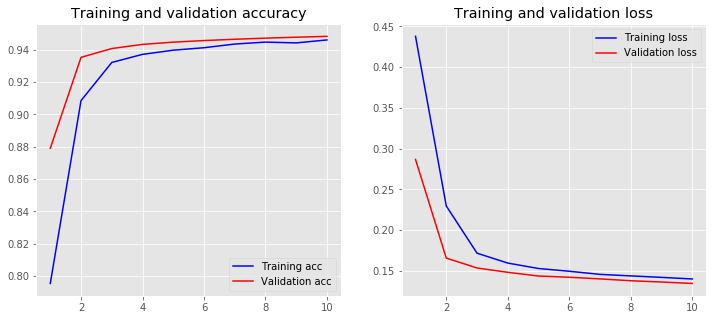

In [0]:
plot_history(history,'/content/drive/My Drive/gunlaws/accuracy and losses graphs.jpg')

In [0]:
loss, accuracy = model.evaluate(X_test.iloc[:,1:], y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

15631/15631 [==============================] - 41s 3ms/step
Testing Accuracy:  0.9483


In [0]:
# predict probabilities for test set
yhat_probs = model.predict(X_test.iloc[:,1:], verbose=1)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test.iloc[:,1:], verbose=1)

15631/15631 [==============================] - 41s 3ms/step


In [0]:
y_test1=y_test.idxmax(axis=1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test1, yhat_classes)
print('Accuracy:{}\n'.format(accuracy))
# precision tp / (tp + fp)
precision = precision_score(y_test1, yhat_classes,average='macro')
print('Precision:{}\n'.format(precision))
# recall: tp / (tp + fn)
recall = recall_score(y_test1, yhat_classes,average='macro')
print('Recall:{}\n'.format(recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, yhat_classes,average='macro')
print('F1 score:{}\n'.format(f1))
matrix = confusion_matrix(y_test1, yhat_classes)
print("Confusion Matrix:")
print(matrix)

Accuracy:0.920926364276118

Precision:0.9237990989006342

Recall:0.915786476766194

F1 score:0.9196055083289161

Confusion Matrix:
[[5366  404  115]
 [ 351 6388   59]
 [ 180  127 2641]]
